# Calificación en IMDB de datos top 1,000 IMDB
## Limpieza de base de datos

In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("imdb.csv")

In [3]:
df.head()

,id,title,genres,averageRating,numVotes,releaseYear
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2222284,2008
1,tt5491994,Planet Earth II,Documentary,9.5,161331,2016
2,tt0185906,Band of Brothers,"Drama, History, War",9.4,543090,2001
3,tt0795176,Planet Earth,"Documentary, Family",9.4,222856,2006
4,tt5152226,Tree of Life,Drama,9.4,11606,2014


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             1000 non-null   object 
 1   title          1000 non-null   object 
 2   genres         1000 non-null   object 
 3   averageRating  1000 non-null   float64
 4   numVotes       1000 non-null   int64  
 5   releaseYear    1000 non-null   int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 47.0+ KB


In [5]:
df.isna().sum()

id               0
title            0
genres           0
averageRating    0
numVotes         0
releaseYear      0
dtype: int64

In [6]:
duplicates = df[df.duplicated(subset=['title'], keep=False)]

sorted_duplicates = duplicates.sort_values(by='title')

sorted_duplicates   # No se encontraron duplicados, por la fecha de estreno se ve que es otra temporada.

,id,title,genres,averageRating,numVotes,releaseYear
288,tt0314979,Battlestar Galactica,"Action, Adventure, Drama",8.5,81468,2003
136,tt0407362,Battlestar Galactica,"Action, Adventure, Drama",8.7,178565,2004
411,tt0056751,Doctor Who,"Adventure, Drama, Family",8.4,40163,1963
272,tt0436992,Doctor Who,"Adventure, Drama, Sci-Fi",8.5,252211,2005
291,tt0088509,Dragon Ball,"Action, Adventure, Animation",8.5,68644,1986
294,tt0280249,Dragon Ball,"Action, Adventure, Animation",8.5,66659,1995
91,tt0214341,Dragon Ball Z,"Action, Adventure, Animation",8.8,153281,1996
98,tt0121220,Dragon Ball Z,"Action, Adventure, Animation",8.8,90427,1989
870,tt0092345,DuckTales,"Action, Adventure, Animation",8.0,35662,1987
565,tt5531466,DuckTales,"Action, Adventure, Animation",8.3,12680,2017


In [7]:
duplicates = df[df.duplicated(subset=['id'], keep=False)]

sorted_duplicates = duplicates.sort_values(by='title')

sorted_duplicates   # Tampoco se encontraron duplicados por ID

,id,title,genres,averageRating,numVotes,releaseYear


In [8]:
def animated_or_not(x):
  if "Animation" in str(x):
    return "yes"
  return "no"

In [9]:
# Creamos una columna de tipo (Película o serie)
df["Animated"] = df["genres"].apply(animated_or_not)

In [10]:
df.head()

,id,title,genres,averageRating,numVotes,releaseYear,Animated
0,tt0903747,Breaking Bad,"Crime, Drama, Thriller",9.5,2222284,2008,no
1,tt5491994,Planet Earth II,Documentary,9.5,161331,2016,no
2,tt0185906,Band of Brothers,"Drama, History, War",9.4,543090,2001,no
3,tt0795176,Planet Earth,"Documentary, Family",9.4,222856,2006,no
4,tt5152226,Tree of Life,Drama,9.4,11606,2014,no


In [11]:
animated_series = df[df["Animated"] == "yes"]
animated_series

,id,title,genres,averageRating,numVotes,releaseYear,Animated
7,tt0417299,Avatar: The Last Airbender,"Action, Adventure, Animation",9.3,387217,2005,yes
11,tt7678620,Bluey,"Animation, Family",9.3,32363,2018,yes
24,tt2861424,Rick and Morty,"Adventure, Animation, Comedy",9.1,623722,2013,yes
25,tt2560140,Attack on Titan,"Action, Adventure, Animation",9.1,552839,2013,yes
26,tt1355642,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Animation",9.1,206688,2009,yes
...,...,...,...,...,...,...,...
983,tt0063950,"Scooby Doo, Where Are You!","Adventure, Animation, Comedy",7.9,43024,1969,yes
986,tt0343314,Teen Titans,"Action, Adventure, Animation",7.9,39255,2003,yes
988,tt0131613,Teenage Mutant Ninja Turtles,"Action, Adventure, Animation",7.9,38482,1987,yes
989,tt0480489,Elfen Lied,"Action, Animation, Drama",7.9,38021,2004,yes


In [12]:
df["genres"] = df["genres"].str.replace(", Animation, ", ", ")
df["genres"] = df["genres"].str.replace(", Animation", "")
df["genres"] = df["genres"].str.replace("Animation, ", "")

In [13]:
animated_series = df[df["Animated"] == "yes"]
animated_series

,id,title,genres,averageRating,numVotes,releaseYear,Animated
7,tt0417299,Avatar: The Last Airbender,"Action, Adventure",9.3,387217,2005,yes
11,tt7678620,Bluey,Family,9.3,32363,2018,yes
24,tt2861424,Rick and Morty,"Adventure, Comedy",9.1,623722,2013,yes
25,tt2560140,Attack on Titan,"Action, Adventure",9.1,552839,2013,yes
26,tt1355642,Fullmetal Alchemist: Brotherhood,"Action, Adventure",9.1,206688,2009,yes
...,...,...,...,...,...,...,...
983,tt0063950,"Scooby Doo, Where Are You!","Adventure, Comedy",7.9,43024,1969,yes
986,tt0343314,Teen Titans,"Action, Adventure",7.9,39255,2003,yes
988,tt0131613,Teenage Mutant Ninja Turtles,"Action, Adventure",7.9,38482,1987,yes
989,tt0480489,Elfen Lied,"Action, Drama",7.9,38021,2004,yes


In [14]:
# Guardamos un nuevo archivo con los cambios hechos
df.to_csv("imdb_clean.csv", index=False)

In [15]:
numerical_columns = [col for col in animated_series.columns if df[col].dtype != "O"]
correlation_matrix = animated_series[numerical_columns].corr()
correlation_matrix

,averageRating,numVotes,releaseYear
averageRating,1.000000,0.494407,0.047226
numVotes,0.494407,1.000000,-0.057389
releaseYear,0.047226,-0.057389,1.000000


<Axes: >

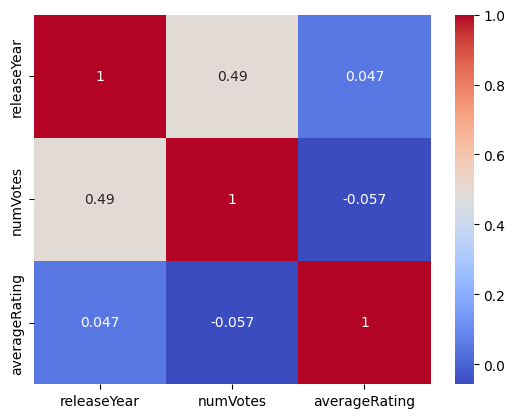

In [16]:
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", yticklabels=correlation_matrix.index[::-1], xticklabels=correlation_matrix.columns[::-1])


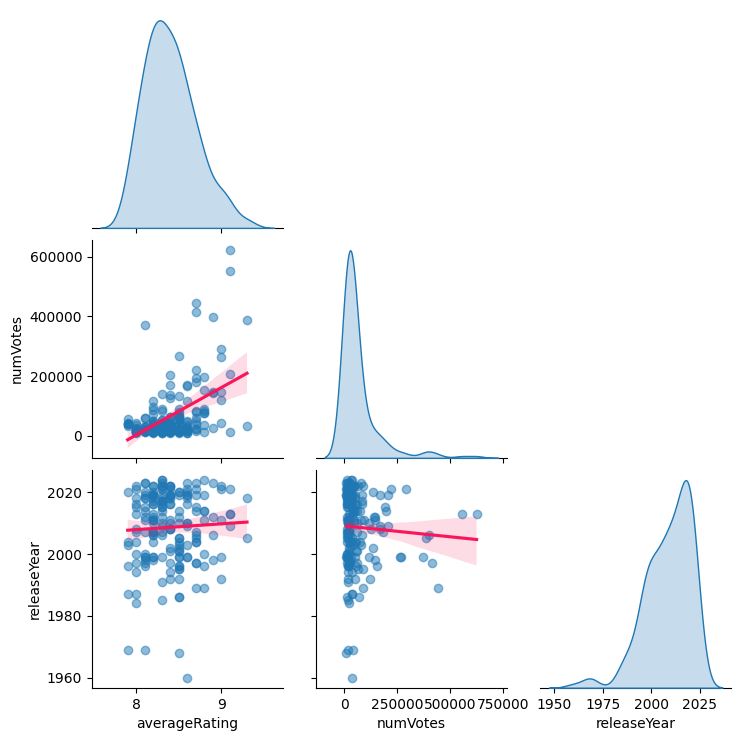

In [17]:
sns.pairplot(animated_series[numerical_columns], 
             diag_kind="kde",
             kind="reg",
             corner=True,
             plot_kws={
                 "line_kws": {
                     "color": "#fa165b"
                     },
                 "scatter_kws": {
                     "alpha": 0.5
                 }
                 }
             )

<Axes: xlabel='releaseYear', ylabel='averageRating'>

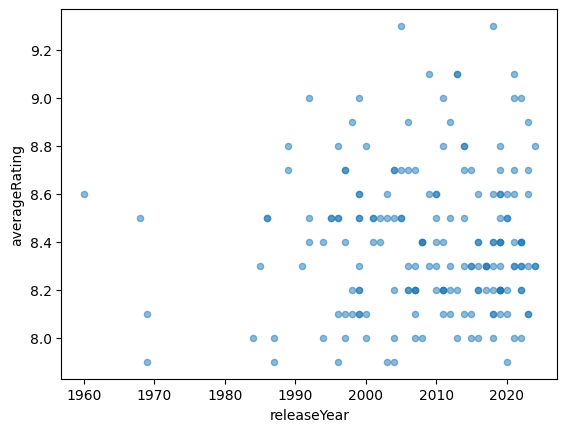

In [18]:
animated_series.plot.scatter(x="releaseYear", y="averageRating", alpha=0.5)

<Axes: xlabel='releaseYear', ylabel='averageRating'>

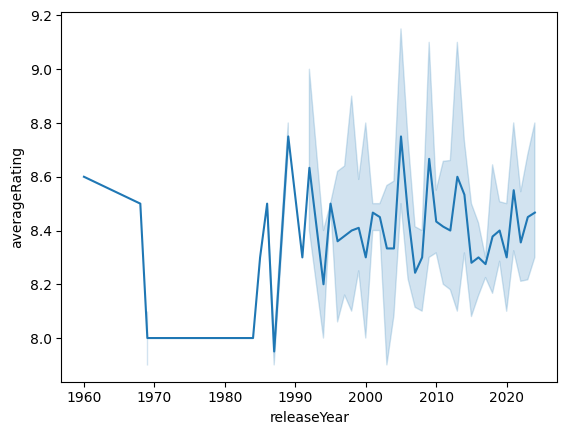

In [19]:
sns.lineplot(data=animated_series, x="releaseYear", y="averageRating", estimator="mean")

<Axes: >

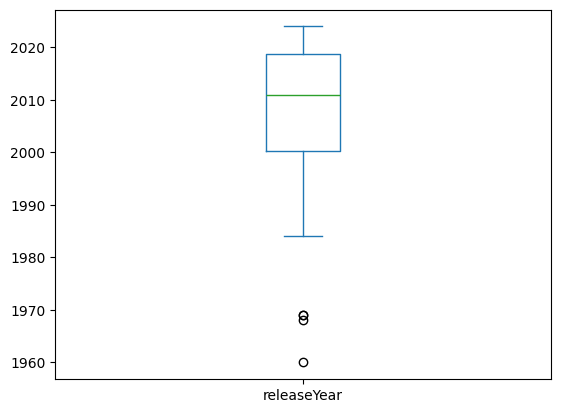

In [20]:
animated_series["releaseYear"].plot.box()